## 第一部分：获取生猪价格序列，对数据进行分类整理

In [1]:
import pandas as pd
import numpy as np

① **数据读入**

In [2]:
# 1、读取数据
rawFile = pd.read_csv('生猪月度价格历史统计表.csv', header=1, encoding='utf-8')
# 2、数据空值处理(数据清洁将省略；如果有控制提示用户重新更改数据)
flag = True
for i in range(rawFile.shape[1]):
    if(rawFile.iloc[:, i].isna().sum()):
        print('第'+ str(i) +'列日期有空值~！请检测并确认格式后，重新运行此行~！')
        flag = False
        break
    elif(rawFile.iloc[:, i].isnull().sum()):
        print('第'+ str(i) +'列价格有null数据~！请检测并确认格式后，重新运行此行~！')
        flag = False
        break
if flag:
    print('数据完整，可以使用~！')
    # 3、将数据转换为list形式，第一组为日期列表，第二组为价格列表
    dateData = rawFile.iloc[:, 0].tolist()
    priceData = rawFile.iloc[:, 1].round(4).tolist()

数据完整，可以使用~！


② **分解后的数据样式** 

-> 日期数组

In [3]:
print(dateData)

[200607, 200608, 200609, 200610, 200611, 200612, 200701, 200702, 200703, 200704, 200705, 200706, 200707, 200708, 200709, 200710, 200711, 200712, 200801, 200802, 200803, 200804, 200805, 200806, 200807, 200808, 200809, 200810, 200811, 200812, 200901, 200902, 200903, 200904, 200905, 200906, 200907, 200908, 200909, 200910, 200911, 200912, 201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008, 201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112, 201201, 201202, 201203, 201204, 201205, 201206, 201207, 201208, 201209, 201210, 201211, 201212, 201301, 201302, 201303, 201304, 201305, 201306, 201307, 201308, 201309, 201310, 201311, 201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611,

-> 价格数组

In [4]:
print(priceData)

[7.26, 7.61, 8.424, 8.184, 9.19, 9.984, 10.02, 9.106, 8.92, 9.779, 12.037, 12.639, 14.929, 13.757, 12.96, 13.203, 15.145, 16.335, 16.819, 17.309, 17.397, 16.805, 15.84, 15.55, 14.68, 14.1, 12.15, 11.83, 12.02, 13.55, 13.386, 11.58, 10.66, 10.08, 9.59, 10.58, 11.29, 12.15, 11.92, 11.37, 12.02, 12.78, 11.64, 10.35, 9.63, 10.01, 9.7, 10.37, 12.84, 12.68, 12.79, 13.44, 14.29, 13.61, 14.06, 15.04, 15.01, 15.14, 16.89, 19.61, 19.29, 19.68, 19.15, 17.49, 16.56, 17.25, 17.56, 16.08, 14.77, 14.41, 13.8, 14.11, 13.88, 14.64, 14.74, 14.46, 15.31, 16.46, 17.18, 14.7, 12.77, 12.32, 13.91, 14.4, 15.09, 16.05, 15.87, 15.55, 15.77, 15.38, 12.35, 11.92, 10.77, 10.55, 13.37, 13.01, 13.97, 15.35, 14.52, 13.78, 13.85, 13.32, 12.62, 11.85, 12.24, 13.6, 14.54, 15.65, 18.25, 18.42, 17.31, 16.42, 16.5, 16.55, 18.1, 18.14, 19.75, 20.41, 21.12, 19.91, 18.22, 18.5, 17.16, 16.23, 16.92, 17.42, 18.14, 17.02, 15.89, 14.95, 13.61, 13.94, 13.93, 14.64, 14.4, 14.22, 14.29, 14.92, 14.91, 13.43, 10.49, 10.1, 10.63, 11.5

## 第二部分：周期性分析  
* "猪周期"，根本就是利润驱动的生猪供给周期。猪价是一种典型的周期性变化类产品，一轮大的周期大概持续4年左右，且在一年中猪价也是根据季节性不同而具有较明显的变化趋势。  
* 在不考虑其他外在因素和系统性风险的前提下，其猪价主要受到生猪攻击决定，而后者主要受养殖利润驱动。  
* 猪价的走势一种典型的"非线性时间序列"的数据，这种时间序列的数据具有典型的周期性，对数据按照月份进行切割并罗列，能够较明显的看出他们的这种周期特性。这里所说的周期并不是线性的周期，其相似性指的是具有更好的相关性分析结果。

① **历史月份切割**  
    

-> 根据所需样本数据，按照月份进行切割，这里给定切分月长度，比如：6月份作为起始点，切分月长度为12的话，那就会得到：200607~200706,200707~200806,...,202007~202106...。

In [5]:
SIZE = 24   # 月份切割尺寸
count = 0
tempMonthList = []
monthList = []
tempPriceList = []
priceList = []

dataDict = {}
priceDict = {}

# 序列整理
for i in range(len(dateData)-1, -1, -1):
    tempMonthList.append(dateData[i])  # 日期序列
    tempPriceList.append(priceData[i]) # 价格序列
    count += 1
    if len(tempMonthList) == SIZE:
        # print(list(reversed(tempMonthList)))
        # 日期序列
        monthList.append(list(reversed(tempMonthList)))
        tempMonthList = []
        # 价格序列
        priceList.append(list(reversed(tempPriceList)))
        tempPriceList = []        
        count = 0

temp01 = []
temp02 = []
# 按照月份切割
for m in ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']:
    for i in range(len(monthList)):
        # 挑选数据
        if str(monthList[i][0])[4::] == m:
            temp01.append(monthList[i]) 
            temp02.append(priceList[i])
    if len(temp01) != 0:
        # 合并到字典
        dataDict[m + "月份日期开始+" + str(SIZE) + "个月"] = temp01
        priceDict[m + "月份价格开始+" + str(SIZE) + "个月"] = temp02
        temp01 = []
        temp02 = []

print(dataDict.keys())
print(priceDict.keys())

dict_keys(['12月份日期开始+24个月'])
dict_keys(['12月份价格开始+24个月'])


In [6]:
# print(dataDict['03月份日期数据'])
# for i in dataDict['06月份日期数据']:
#     print(i)

In [7]:
# print(priceDict['03月份价格数据'])
# for i in priceDict['03月份价格数据']:
#     print(i)

② **月份数据展示**  

In [8]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
# 支持中文
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

12月份日期开始+24个月 12月份价格开始+24个月


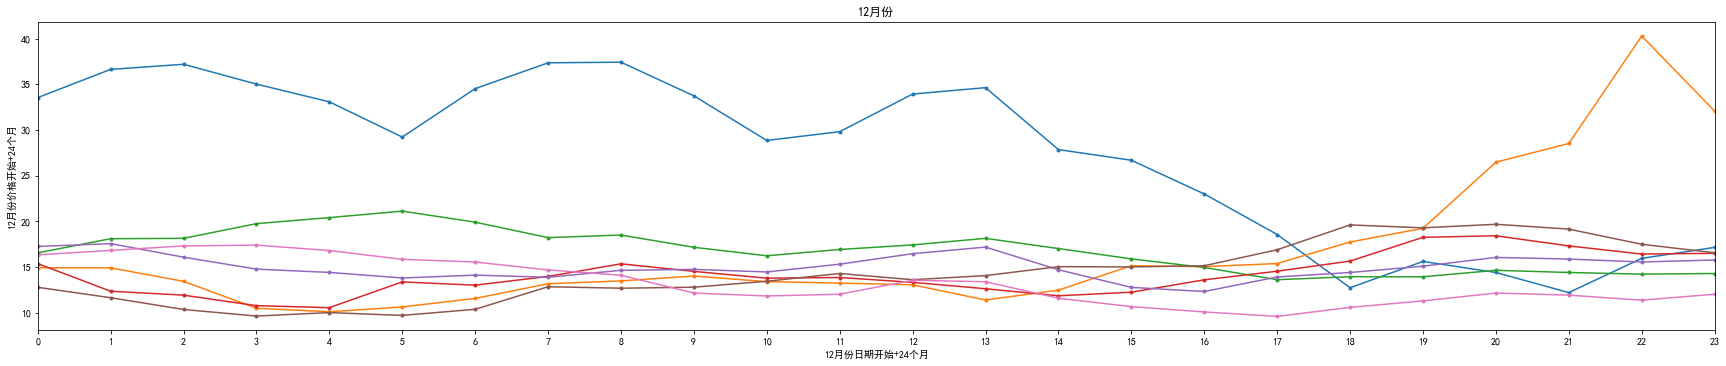

In [9]:
for i in range(len(dataDict.keys())):
    # 循环显示图形
    dateKey = list(dataDict.keys())[i]
    priceKey = list(priceDict.keys())[i]
    
    # 标题内容
    plt.figure(i, figsize=(len(priceDict[priceKey][0]), 5))
    plt.title(dateKey[0:4])
    plt.tight_layout()
    # x轴
#     x = range(0, len(priceDict[priceKey][0]) -1)
    # x轴刻度
    ax = plt.gca()
    ax.set_xlim([0, len(priceDict[priceKey][0])-1])
    ax.xaxis.set_major_locator(MultipleLocator(1))  # 间距
    print(dateKey, priceKey)
    for j in priceDict[priceKey]:
        plt.xlabel(dateKey)
        plt.ylabel(priceKey)
        plt.plot(j, marker=".")

③ **月份相关性分析**  

In [10]:
for i in range(len(dataDict.keys())):
    # 循环显示图形
    dateKey = list(dataDict.keys())[i]
    priceKey = list(priceDict.keys())[i]
    print(dateKey, priceKey)
    for j in priceDict[priceKey]:
        print(j)

12月份日期开始+24个月 12月份价格开始+24个月
[33.55, 36.64, 37.2, 35.03, 33.09, 29.23, 34.53, 37.36, 37.43, 33.74, 28.86, 29.82, 33.94, 34.64, 27.86, 26.69, 23.0, 18.56, 12.73, 15.61, 14.4, 12.2, 15.95, 17.15]
[14.92, 14.91, 13.43, 10.49, 10.1, 10.63, 11.56, 13.17, 13.48, 14.01, 13.4, 13.24, 13.05, 11.39, 12.47, 15.14, 15.04, 15.38, 17.74, 19.24, 26.48, 28.53, 40.29, 32.08]
[16.55, 18.1, 18.14, 19.75, 20.41, 21.12, 19.91, 18.22, 18.5, 17.16, 16.23, 16.92, 17.42, 18.14, 17.02, 15.89, 14.95, 13.61, 13.94, 13.93, 14.64, 14.4, 14.22, 14.29]
[15.38, 12.35, 11.92, 10.77, 10.55, 13.37, 13.01, 13.97, 15.35, 14.52, 13.78, 13.85, 13.32, 12.62, 11.85, 12.24, 13.6, 14.54, 15.65, 18.25, 18.42, 17.31, 16.42, 16.5]
[17.25, 17.56, 16.08, 14.77, 14.41, 13.8, 14.11, 13.88, 14.64, 14.74, 14.46, 15.31, 16.46, 17.18, 14.7, 12.77, 12.32, 13.91, 14.4, 15.09, 16.05, 15.87, 15.55, 15.77]
[12.78, 11.64, 10.35, 9.63, 10.01, 9.7, 10.37, 12.84, 12.68, 12.79, 13.44, 14.29, 13.61, 14.06, 15.04, 15.01, 15.14, 16.89, 19.61, 19.29, 19.

In [11]:
# 一组数据情况
index = []
for i in range(len(dataDict[dateKey])):
    index.append(str(i) + '组')

data = pd.DataFrame(np.array(priceDict[priceKey]).T, columns =index)
data

0组     1组     2组     3组     4组     5组      6组
0   33.55  14.92  16.55  15.38  17.25  12.78  16.335
1   36.64  14.91  18.10  12.35  17.56  11.64  16.819
2   37.20  13.43  18.14  11.92  16.08  10.35  17.309
3   35.03  10.49  19.75  10.77  14.77   9.63  17.397
4   33.09  10.10  20.41  10.55  14.41  10.01  16.805
5   29.23  10.63  21.12  13.37  13.80   9.70  15.840
6   34.53  11.56  19.91  13.01  14.11  10.37  15.550
7   37.36  13.17  18.22  13.97  13.88  12.84  14.680
8   37.43  13.48  18.50  15.35  14.64  12.68  14.100
9   33.74  14.01  17.16  14.52  14.74  12.79  12.150
10  28.86  13.40  16.23  13.78  14.46  13.44  11.830
11  29.82  13.24  16.92  13.85  15.31  14.29  12.020
12  33.94  13.05  17.42  13.32  16.46  13.61  13.550
13  34.64  11.39  18.14  12.62  17.18  14.06  13.386
14  27.86  12.47  17.02  11.85  14.70  15.04  11.580
15  26.69  15.14  15.89  12.24  12.77  15.01  10.660
16  23.00  15.04  14.95  13.60  12.32  15.14  10.080
17  18.56  15.38  13.61  14.54  13.91  16.89   9.590
18  12.73  17.74  13.94  15.65  14.40  19.61  10.580
19  15.61  19.24  13.93  18.25  15.09  19.29  11.290
20  14.40  26.48  14.64  18.42  16.05  19.68  12.150
21  12.20  28.53  14.40  17.31  15.87  19.15  11.920
22  15.95  40.29  14.22  16.42  15.55  17.49  11.370
23  17.15  32.08  14.29  16.50  15.77  16.56  12.020

In [12]:
# 相关系数矩阵
corr_matrix = data.corr()
corr_matrix

0组        1组        2组        3组        4组        5组        6组
0组  1.000000 -0.724134  0.826076 -0.718205  0.121327 -0.890397  0.711138
1组 -0.724134  1.000000 -0.670308  0.706366  0.217439  0.669509 -0.409407
2组  0.826076 -0.670308  1.000000 -0.712149 -0.007817 -0.916284  0.810855
3组 -0.718205  0.706366 -0.712149  1.000000  0.174843  0.787826 -0.498164
4组  0.121327  0.217439 -0.007817  0.174843  1.000000  0.035153  0.365808
5组 -0.890397  0.669509 -0.916284  0.787826  0.035153  1.000000 -0.802066
6组  0.711138 -0.409407  0.810855 -0.498164  0.365808 -0.802066  1.000000

In [13]:
# 热力图数据准备
# X轴和Y轴所需显示内容，就是表格中的表头,注意转接成list格式   
axis_data = list(corr_matrix.columns)
axis_data

['0组', '1组', '2组', '3组', '4组', '5组', '6组']

In [14]:
# value值
# 保留小数点后两位
temp = []
value = []
for i in range(len(axis_data)):
    for j in range(len(corr_matrix.iloc[i])):
#         print(i, j , corr_matrix.iloc[i][j])
        temp.append(i)
        temp.append(j)
        temp.append(round(corr_matrix.iloc[i][j],2))
        value.append(temp)
        temp = []

In [15]:
# 展示相关系数矩阵
# value

In [16]:
# 导入pyecharts动态图标数据分析包
from pyecharts import options as opts
from pyecharts.charts import HeatMap

In [17]:
# Jupyter中显示
c = (
    HeatMap()
    .add_xaxis(axis_data)   # x轴的表示内容
    .add_yaxis(
        "相关系数矩阵",
        axis_data,      # y轴的表示内容
        value,       # 数值矩阵
        label_opts=opts.LabelOpts(is_show=True, position="inside"),
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(title="相关系数矩阵与热力图"),
        visualmap_opts=opts.VisualMapOpts(
            min_=0, max_=1, is_calculable=True, border_width=1, orient='vertical', pos_right=25, pos_bottom=50
        ),
    )
)
c.render_notebook()

* 经过数据分析：0-2/6、1-3/5；0/1/2/3/5/6组数据具有参考性，剔除第四组数据

In [18]:
filePrice = []
fileData = []

for i in range(len(dataDict['12月份日期开始+24个月'])):
    if i != 4:
        fileData.append(dataDict['12月份日期开始+24个月'][i])
        
for i in range(len(priceDict['12月份价格开始+24个月'])):
    if i != 4:
        filePrice.append(priceDict['12月份价格开始+24个月'][i])
        
print(fileData)

[[201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111], [201712, 201801, 201802, 201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810, 201811, 201812, 201901, 201902, 201903, 201904, 201905, 201906, 201907, 201908, 201909, 201910, 201911], [201512, 201601, 201602, 201603, 201604, 201605, 201606, 201607, 201608, 201609, 201610, 201611, 201612, 201701, 201702, 201703, 201704, 201705, 201706, 201707, 201708, 201709, 201710, 201711], [201312, 201401, 201402, 201403, 201404, 201405, 201406, 201407, 201408, 201409, 201410, 201411, 201412, 201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511], [200912, 201001, 201002, 201003, 201004, 201005, 201006, 201007, 201008, 201009, 201010, 201011, 201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107, 201108, 201109, 201110, 201111], [200712, 200801, 200802, 2008

In [19]:
print(filePrice)

[[33.55, 36.64, 37.2, 35.03, 33.09, 29.23, 34.53, 37.36, 37.43, 33.74, 28.86, 29.82, 33.94, 34.64, 27.86, 26.69, 23.0, 18.56, 12.73, 15.61, 14.4, 12.2, 15.95, 17.15], [14.92, 14.91, 13.43, 10.49, 10.1, 10.63, 11.56, 13.17, 13.48, 14.01, 13.4, 13.24, 13.05, 11.39, 12.47, 15.14, 15.04, 15.38, 17.74, 19.24, 26.48, 28.53, 40.29, 32.08], [16.55, 18.1, 18.14, 19.75, 20.41, 21.12, 19.91, 18.22, 18.5, 17.16, 16.23, 16.92, 17.42, 18.14, 17.02, 15.89, 14.95, 13.61, 13.94, 13.93, 14.64, 14.4, 14.22, 14.29], [15.38, 12.35, 11.92, 10.77, 10.55, 13.37, 13.01, 13.97, 15.35, 14.52, 13.78, 13.85, 13.32, 12.62, 11.85, 12.24, 13.6, 14.54, 15.65, 18.25, 18.42, 17.31, 16.42, 16.5], [12.78, 11.64, 10.35, 9.63, 10.01, 9.7, 10.37, 12.84, 12.68, 12.79, 13.44, 14.29, 13.61, 14.06, 15.04, 15.01, 15.14, 16.89, 19.61, 19.29, 19.68, 19.15, 17.49, 16.56], [16.335, 16.819, 17.309, 17.397, 16.805, 15.84, 15.55, 14.68, 14.1, 12.15, 11.83, 12.02, 13.55, 13.386, 11.58, 10.66, 10.08, 9.59, 10.58, 11.29, 12.15, 11.92, 11.3

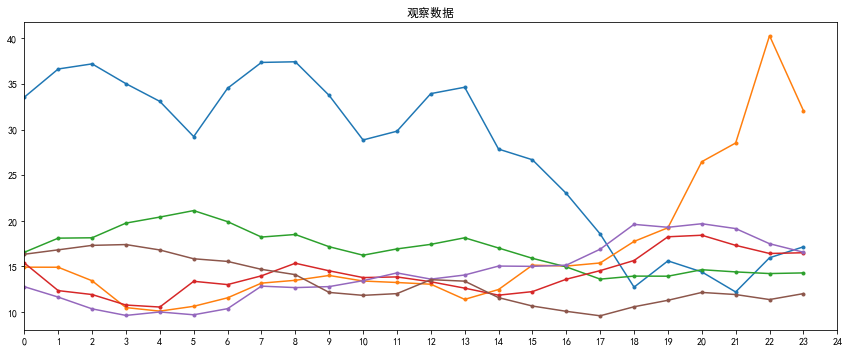

In [20]:
# print(file[i])
plt.figure(figsize=(12, 5))
plt.title('观察数据')
plt.tight_layout()
ax = plt.gca()
ax.set_xlim([0, SIZE])
ax.xaxis.set_major_locator(MultipleLocator(1))  # 间距
for j in filePrice:
    plt.plot(j, marker=".")

## 第三部分：拆分训练集和测试集并采用支持向量机回归来进行预测  
* 

In [603]:
X = []
y = []
count  = 0
for i in range(len(filePrice)):
    if count == 0:
        y = filePrice[i]
        count += 1
    else:
        X.append(filePrice[i])

In [643]:
# print(X)

In [605]:
X = np.array(X).T
X = StandardScaler().fit_transform(X)

In [606]:
y = np.array(y)

In [607]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter("ignore")

In [608]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y, test_size=0.3)

In [609]:
Kernel = ["linear", "poly", "rbf", "sigmoid"]

In [610]:
for kernel in Kernel:
    svr = SVR(kernel=kernel
             ,gamma="auto"
             , degree =15
             ,cache_size=50000
             ).fit(Xtrain, Ytrain)
    print("The accuracy under kernel %s is %f" % (kernel, svr.score(Xtest, Ytest)))

The accuracy under kernel linear is 0.713193
The accuracy under kernel poly is -133.312343
The accuracy under kernel rbf is -0.447896
The accuracy under kernel sigmoid is 0.143410


In [611]:
# 确定核函数

In [612]:
svr = SVR(kernel=Kernel[0]  # 选择核函数
         ,gamma="auto"
         ,degree =15
         ,cache_size=50000
         ).fit(Xtrain, Ytrain)

y_predict=svr.predict(X)

In [613]:
y_predict

array([30.37358211, 34.02956125, 36.57492061, 38.85626127, 38.18738606,
       35.19530284, 34.63030289, 30.53498188, 29.01629   , 28.59545819,
       28.75939467, 27.73339936, 29.79530992, 30.10214007, 28.52319996,
       27.13699826, 25.79499769, 23.04866241, 18.89041318, 17.03421772,
       14.50030205, 15.29233303, 13.85737111, 17.79922199])

In [614]:
# print('svr模型自带评分机制：',svr.score(Xtest,y_predict))
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print('r方：',r2_score(filePrice[0],y_predict))
print('均方误差MSE:',mean_squared_error(filePrice[0],y_predict))
print('平均绝对误差MAE:',mean_absolute_error(filePrice[0],y_predict))

r方： 0.7981664707349527
均方误差MSE: 15.10156726730286
平均绝对误差MAE: 3.1069662572533363


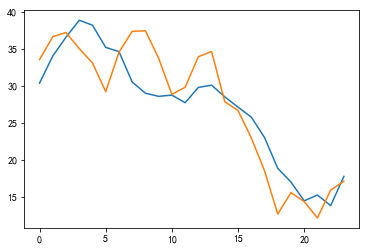

In [615]:
plt.plot(y_predict)
plt.plot(filePrice[0])

-----------------------------------------------

In [683]:
# 设置预测数据
Xpredict = []
count = 0
for i in range(len(filePrice)-1, -1, -1):
    if count != 1:
        Xpredict.append(filePrice[i])
    count += 1

In [684]:
# print(Xpredict)

In [685]:
Xpredict = np.array(Xpredict).T
Xpredict = StandardScaler().fit_transform(Xpredict)

In [686]:
# Xpredict
Ypredict = svr.predict(Xpredict)
# Ypredict
Ypredict = list(reversed(Ypredict))

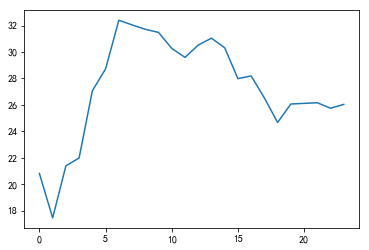

In [687]:
plt.plot(Ypredict)

In [688]:
a = np.hstack((filePrice[0], Ypredict))

## 最终验证效果数据和展示图

Text(0.5, 26.0, '月份时间轴')

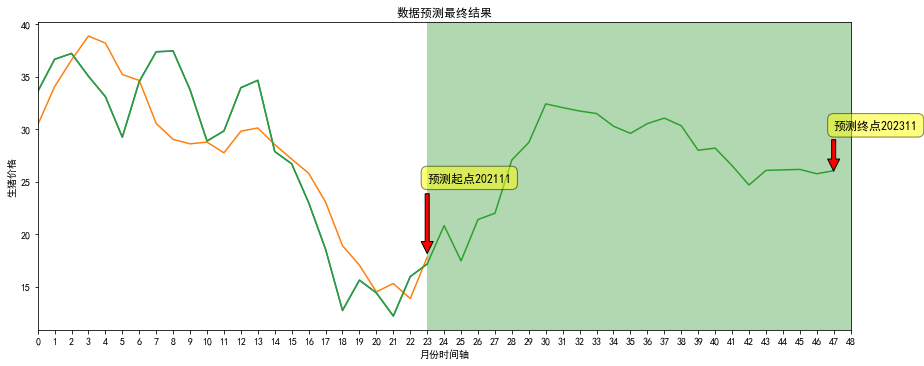

In [710]:
plt.figure(figsize=(12, 5))
plt.title('数据预测最终结果')
plt.tight_layout()
ax = plt.gca()
ax.set_xlim([0, SIZE*2])
ax.xaxis.set_major_locator(MultipleLocator(1))  # 间距
plt.plot(filePrice[0])
plt.plot(y_predict)
plt.plot(a)
plt.axvspan(xmin=23, xmax=48, facecolor='g', alpha=0.3)
plt.annotate('预测起点202111',
   xy=(23,17.79922199),
   xytext=(23,25),
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red',
   shrink=0.05),fontsize=12)
plt.annotate('预测终点202311',
   xy=(47,25.79922199),
   xytext=(47,30),
   bbox = dict(boxstyle = 'round,pad=0.5',
   fc = 'yellow', alpha = 0.5),
   arrowprops=dict(facecolor='red',
   shrink=0.05),fontsize=12)
plt.ylabel('生猪价格')
plt.xlabel('月份时间轴')

* 预测前 24个月的实际数值：  
【日期】：  
[201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111]  
【数值】filePrice[0]：    
[33.55, 36.64, 37.2, 35.03, 33.09, 29.23, 34.53, 37.36, 37.43, 33.74, 28.86, 29.82, 33.94, 34.64, 27.86, 26.69, 23.0, 18.56, 12.73, 15.61, 14.4, 12.2, 15.95, 17.15]

* 预测前24个月的预测数值：  
【日期】：  
[201912, 202001, 202002, 202003, 202004, 202005, 202006, 202007, 202008, 202009, 202010, 202011, 202012, 202101, 202102, 202103, 202104, 202105, 202106, 202107, 202108, 202109, 202110, 202111]  
【数值】y_predict：    
[30.37358211 34.02956125 36.57492061 38.85626127 38.18738606 35.19530284
 34.63030289 30.53498188 29.01629    28.59545819 28.75939467 27.73339936
 29.79530992 30.10214007 28.52319996 27.13699826 25.79499769 23.04866241
 18.89041318 17.03421772 14.50030205 15.29233303 13.85737111 17.79922199]

* 预测前24个的预测数值与实际数据的拟合效果：  
**r方： 0.7981664707349527**  
**均方误差MSE: 15.10156726730286**    
**平均绝对误差MAE: 3.1069662572533363**    

* 预测后24个月的预测数据：   
【日期】：  
[202112~202311]  
【数值】Ypredict：   
[20.807477654891336, 17.449531077474877, 21.385698359855283, 21.984594927736666, 27.061093736883432, 28.718693564610053, 32.39847674608909, 32.044719456924135, 31.71550831866264, 31.479885643005712, 30.274148132962864, 29.58935227119936, 30.51897010466909, 31.042141880308044, 30.31763010747937, 27.98083103826386, 28.187611113101173, 26.522391400742034, 24.669928479168597, 26.064212385478957, 26.112974823733317, 26.157645380551596, 25.745117442625315, 26.033374475267486]